<a href="https://colab.research.google.com/github/elifyildirim1/SucroseHydrolysis/blob/main/SucroseHydrolysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANSA_concentrations: [0.00588742 0.11157381 0.1939977  0.28331419 0.37722573 0.49439977
 0.64115451]
glucose_concentrations: [0.01485724 0.28156291 0.48956434 0.71495962 0.95195079 1.2476462
 1.61799021]
initial_rates: [0.13335283 0.10400071 0.07513176 0.04739824 0.0422422  0.03366764]
substrate_concentrations: [1.2476462  0.95195079 0.71495962 0.48956434 0.28156291 0.01485724]
1/s: [0.80150927 1.05047447 1.3986804  2.04263244 3.55160415]
1/v: [ 7.49890333  9.61531855 13.3099506  21.09783199 23.67300854]


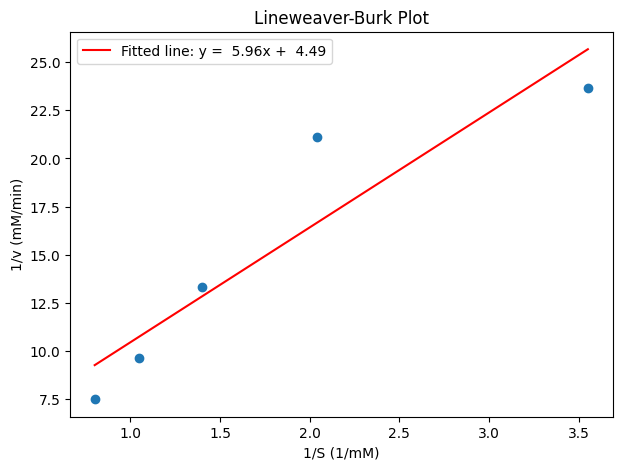

Vmax: 0.22
Km: 1.33
substrate_concentrations: [1.2476462  0.95195079 0.71495962 0.48956434 0.28156291 0.01485724]
initial_rates [0.13335283 0.10400071 0.07513176 0.04739824 0.0422422  0.03366764]


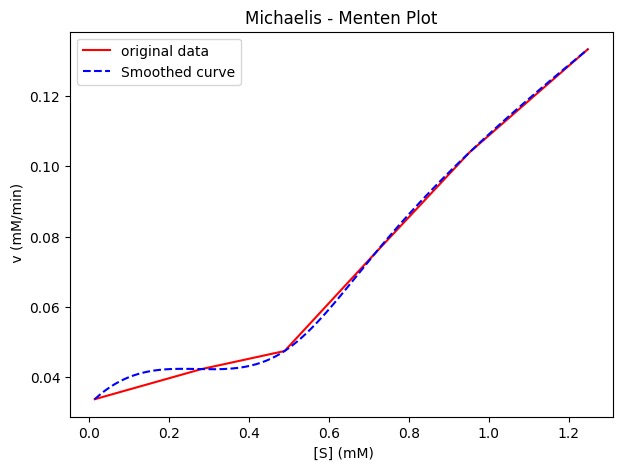

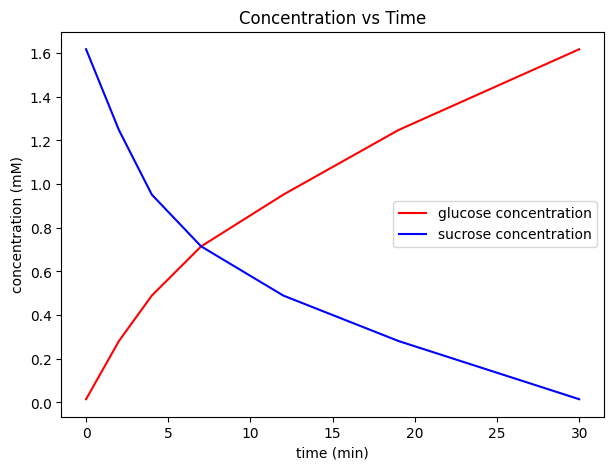

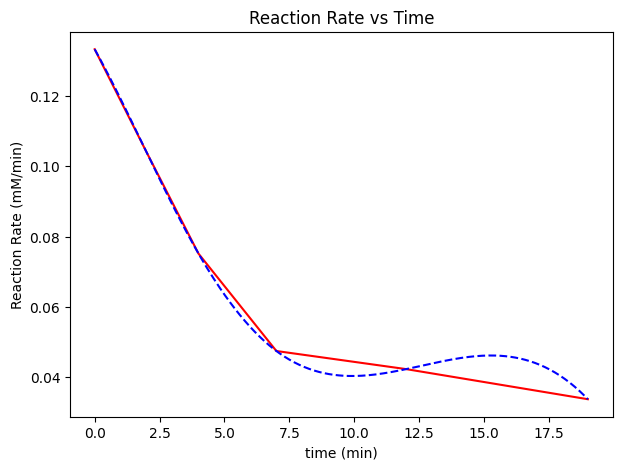

In [47]:
# this code aims to simulate the hydrolysis reaction of sucrose into glucose & fructose with invertase
# the hydrolysis reaction follows Michaelis-Menten kinetics
# main aim is to calculate the maximum reaction rate & the michaelis menten cst

# import packages
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# define main Michaelis-Menten equation
def reaction_rate(S, Vmax, Km):
  return Vmax * S / (Km + S)

#determining the conc of glucose by absorbance through a UV-Vis spectrophotometer
#calibration curve is utilized
background_abs = 0.284
def ANSA_conc(absorbance, background_abs):
  return (absorbance - background_abs + 0.0205) / (3.482)

MW_ANSA = 198.133 #mg/mmol            ????????????CHECK????????
def glucose_conc(ANSA_conc, MW_ANSA):
  return (ANSA_conc * 1000) / (MW_ANSA * 2)
# divided by 2 with the assumption that equal amounts of glucose and fructose are produced during the reaction
# conc unit changed to micromol/ml

#Experimental data
absorbances = np.array([0.284, 0.652, 0.939, 1.250, 1.577, 1.985, 2.496])
time = np.array([0, 2, 4, 7, 12, 19, 30])

ANSA_concentrations = ANSA_conc(absorbances, background_abs)
glucose_concentrations = np.array(glucose_conc(ANSA_concentrations, MW_ANSA))

print("ANSA_concentrations:", ANSA_concentrations)
print("glucose_concentrations:", glucose_concentrations)

#estimate the initial reaction rates
#assume initial reaction rate = delta concentration / delta time
initial_rates = np.diff(glucose_concentrations) / np.diff(time)

print("initial_rates:",initial_rates)

#specify substrate concentrations from glucose concentrations, being assumed 1:1 stoichiometric ratio
substrate_concentrations = np.flip(glucose_concentrations[:-1])
print("substrate_concentrations:",substrate_concentrations)


# plot the Lineweaver-Burk plot to find Km and Vmax
# 1/v = (Km/Vmax) * 1/S + 1/Vmax ( y = mx + c )
# x - axis
inverse_s = np.reciprocal(substrate_concentrations, dtype = float)
inverse_s = inverse_s[:-1]
print("1/s:",inverse_s)
# y - axis
inverse_v = np.reciprocal(initial_rates, dtype = float)
inverse_v = inverse_v[:-1]
print("1/v:",inverse_v)

Lin_Burk = plt.figure(figsize = (7, 5))
# Fit a linear regression model in order to find the intercept of 1/vmax
slope, intercept = np.polyfit(inverse_s, inverse_v, 1)
# Create a range of x values
x = np.linspace(min(inverse_s), max(inverse_s), 100)

# Plot
plt.scatter(inverse_s, inverse_v)
plt.plot(x, slope*x + intercept, label=f'Fitted line: y = {slope: .2f}x + {intercept: .2f}', color='red')
plt.title('Lineweaver-Burk Plot')
plt.xlabel('1/S (1/mM)')
plt.ylabel('1/v (mM/min)')
plt.legend()
plt.show()

#find Km & Vmax
Vmax = 1/intercept
Km = slope * Vmax
print("Vmax:", round(Vmax, 2))
print("Km:", round(Km, 2))

# Michaelis Menten plot (Rxn Rate vs Substrate Conc.)
print("substrate_concentrations:",substrate_concentrations)
print("initial_rates", initial_rates)

MichaelisMenten_plot = plt.figure(figsize = (7, 5))
plt.plot(substrate_concentrations, initial_rates, color="red", label="original data")
plt.title('Michaelis - Menten Plot')
plt.xlabel(' [S] (mM)')
plt.ylabel(' v (mM/min)')
xnew = np.linspace(substrate_concentrations.min(), substrate_concentrations.max(), 300)
f = interp1d(substrate_concentrations, initial_rates, kind='cubic')
rates_smooth = f(xnew)
plt.plot(xnew, rates_smooth, color='blue', label='Smoothed curve', linestyle="dashed")
plt.legend()
plt.show()

# plot sucrose & glucose concentration vs time
Conc_vs_Time = plt.figure(figsize = (7, 5))
plt.plot(time, glucose_concentrations, label="glucose concentration", color="red")
plt.plot(time, np.flip(glucose_concentrations), label="sucrose concentration", color="blue")
plt.title('Concentration vs Time')
plt.xlabel('time (min)')
plt.ylabel('concentration (mM)')
plt.legend()
plt.show()

# plot reaction rate vs time
RxnRate_vs_Time = plt.figure(figsize = (7, 5))
new_time=time[:-1]
plt.plot(new_time, initial_rates, color="red", label="original data")
plt.title('Reaction Rate vs Time')
plt.xlabel('time (min)')
plt.ylabel('Reaction Rate (mM/min)')
xnew = np.linspace(new_time.min(), new_time.max(), 300)
f = interp1d(new_time, initial_rates, kind='cubic')
rates_smooth = f(xnew)
plt.plot(xnew, rates_smooth, color='blue', label='Smoothed curve', linestyle="dashed")
plt.show()

